# Notebook 04 – Model Training and Evaluation

In this notebook, we train and evaluate several machine learning models using cleaned data that includes patient demographics, cognitive assessments, and lifestyle factors.
Our objective is to estimate the risk of Alzheimer’s disease to aid in early detection and preventive care.

We aim to answer the following questions:
- Which features are most predictive of Alzheimer’s progression?
- Can we predict the Clinical Dementia Rating (CDR) using variables such as MMSE scores, age, and brain volume?

Our approach includes:
- Reusing the environment setup from previous notebooks
- Training and testing multiple predictive models
- Evaluating model performance
- Saving all outputs for integration into a Streamlit app

------------------------

## Load Our Environment

We reuse the same setup from notebook 02. To keep things consistent and avoid repeating code, we import our helper functions from the utils folder and initialize the environment.

In [5]:
# Add the parent folder to the Python path so we can import files from the "utils" folder
import sys
sys.path.append("..")

# Import custom helper functions from our project
from utils.setup_notebook import (
    init_environment,
    load_csv,
    print_shape,
    print_info,
    print_full_info,
    print_description,
    print_categorical_description,
    show_head
)
from utils.save_tools import save_plot, save_notebook_and_summary

# Import commonly used libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Run environment setup
init_environment()
print("All libraries imported and environment initialized.")

Environment setup complete.
All libraries imported and environment initialized.


----------------------

## Load Dataset

We load our cleaned dataset

In [10]:
# Load the cleaned dataset
df = load_csv("../data/alzheimers_clean.csv")

# Basic overview
print_shape(df)
print_info(df)
print_description(df)

Loaded data from ../data/alzheimers_clean.csv with shape (2149, 33)
----- Dataset Shape -----
Rows: 2149, Columns: 33

----- Data Types and Non-Null Counts -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Columns: 33 entries, Age to Diagnosis
dtypes: float64(12), int64(21)
memory usage: 554.2 KB

----- Statistical Summary -----
This summary includes count, mean, std, min, max, and percentiles.



,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
SleepQuality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840


## Check all columns

In [14]:
print("Available columns:")
print(df.columns.tolist())

Available columns:
['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']


-------------------

## Hypothesis and Research Focus

### Problem Statement
How can we use Business Intelligence and AI techniques to assess the risk of Alzheimer's disease based on demographic and lifestyle factors?

### Research Questions
1. Can we predict the risk of Alzheimer's disease based on age, gender, physical activity, and diet?
2. Which features are most predictive of an Alzheimer’s diagnosis?
3. Can we build a predictive dashboard to visualize individual risk levels?

### Hypotheses
- H1: Patients over 75 are more likely to be diagnosed
- H2: Lower MMSE and higher CDR scores are strong indicators
- H3: More physical activity and better diet reduce risk


----------------------

## Feature Selection

Based on the results from our Exploratory Data Analysis in Notebook 03, we selected features that showed strong visual and statistical separation between patients diagnosed with Alzheimer's and those not diagnosed.

These features are clinically meaningful and showed predictive potential in our data:

- **Age**  
  Age is one of the most critical risk factors for Alzheimer’s disease. Our data shows that the probability of diagnosis increases significantly in patients over 75, supporting Hypothesis H1.

- **MMSE (Mini-Mental State Examination)**  
  A cognitive screening tool widely used to assess memory, attention, and orientation. Lower MMSE scores were strongly associated with an Alzheimer’s diagnosis, confirming Hypothesis H2.

- **FunctionalAssessment**  
  Measures the ability to perform daily living tasks independently. Patients with lower scores were more likely to be diagnosed, indicating functional decline related to dementia.

- **ADL (Activities of Daily Living)**  
  Another measure of basic self-care skills. As Alzheimer’s progresses, individuals lose the ability to manage routine tasks, which was reflected in the ADL score distributions.

- **Disorientation**  
  Indicates if a patient is frequently confused about time or place. This symptom appeared more commonly in diagnosed patients, supporting the link to cognitive decline.

- **MemoryComplaints**  
  Self-reported memory issues were significantly more common in diagnosed patients, supporting early-stage detection patterns and Hypothesis H2.

### Target Variable:
- **Diagnosis**  
  A binary classification label indicating whether the patient has been diagnosed with Alzheimer’s (1) or not (0). This is the outcome we aim to predict with our machine learning models.

## Preprocessing

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = ["Age", "MMSE", "FunctionalAssessment", "ADL", "Disorientation", "MemoryComplaints"]
target = "Diagnosis"

X = df[features]
y = df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

## Visualizing Feature Distributions

We visualize the distribution of each selected feature to confirm they show separation by diagnosis.

## Histogram + Save

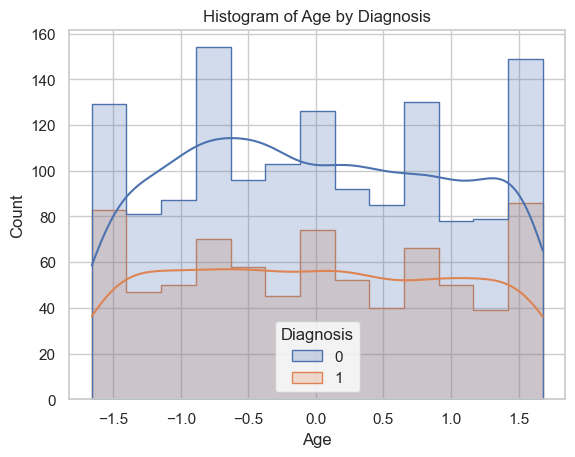

Plot saved to: ../plots/hist_Age.png
Caption saved to: ../plots/hist_Age.txt


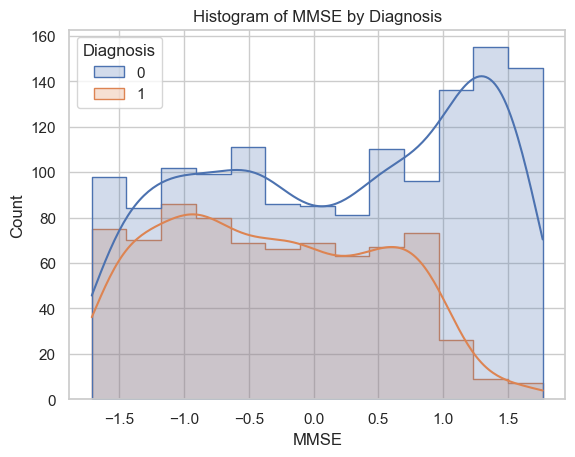

Plot saved to: ../plots/hist_MMSE.png
Caption saved to: ../plots/hist_MMSE.txt


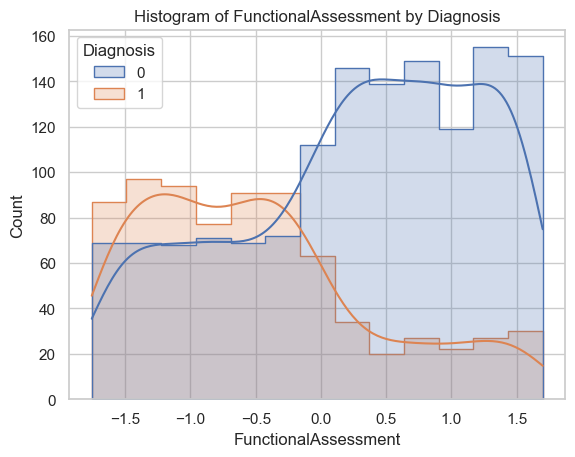

Plot saved to: ../plots/hist_FunctionalAssessment.png
Caption saved to: ../plots/hist_FunctionalAssessment.txt


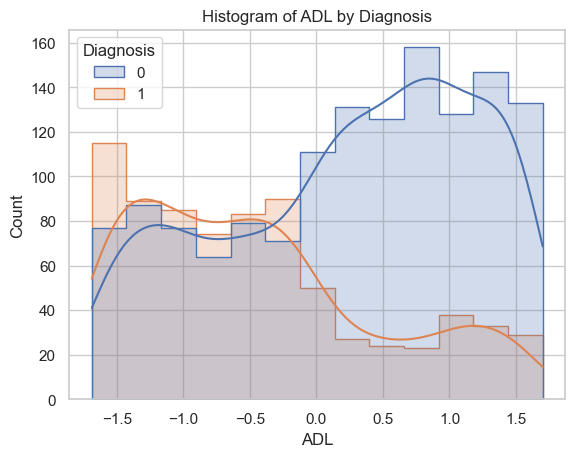

Plot saved to: ../plots/hist_ADL.png
Caption saved to: ../plots/hist_ADL.txt


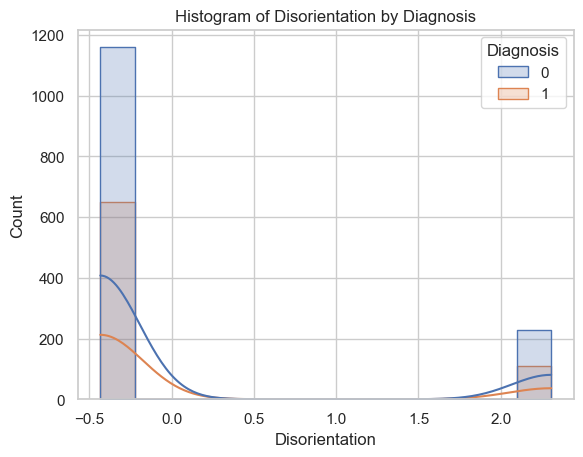

Plot saved to: ../plots/hist_Disorientation.png
Caption saved to: ../plots/hist_Disorientation.txt


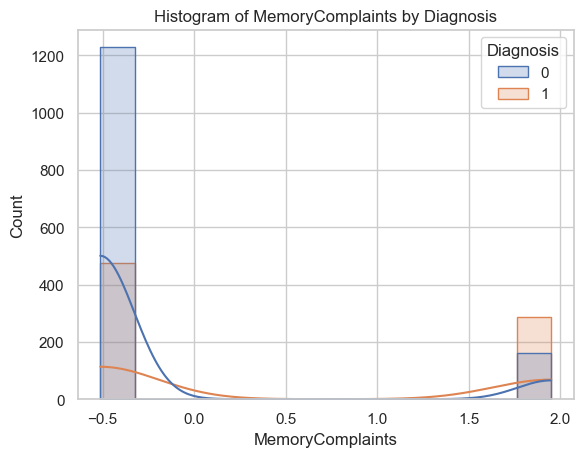

Plot saved to: ../plots/hist_MemoryComplaints.png
Caption saved to: ../plots/hist_MemoryComplaints.txt


In [27]:
import sys
sys.path.append("../utils")
from save_tools import save_plot

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

X_vis = pd.DataFrame(X_scaled, columns=features)
X_vis["Diagnosis"] = y.values

for feature in features:
    fig, ax = plt.subplots()
    sns.histplot(data=X_vis, x=feature, hue="Diagnosis", kde=True, ax=ax, element="step")
    ax.set_title(f"Histogram of {feature} by Diagnosis")
    plt.show()
    save_plot(fig, f"hist_{feature}.png", f"Histogram of {feature} split by diagnosis class.")


## Model Selection Justification

To evaluate predictive performance, we train:
- Logistic Regression
- Decision Tree
- Random Forest
- SVM
- k-Nearest Neighbors

Each is evaluated with accuracy, precision, recall, F1, and confusion matrix.
This supports RQ1 and RQ2, and helps us identify the best model for our Streamlit dashboard (RQ3).


## Train and Evaluate All Models

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

evaluation_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    evaluation_results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "confusion_matrix": confusion_matrix(y_test, y_pred),
        "report": classification_report(y_test, y_pred, output_dict=True)
    }

    print(f"\n{name}")
    print(classification_report(y_test, y_pred))



Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       278
           1       0.75      0.66      0.70       152

    accuracy                           0.80       430
   macro avg       0.79      0.77      0.78       430
weighted avg       0.80      0.80      0.80       430


Decision Tree
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       278
           1       0.72      0.76      0.74       152

    accuracy                           0.81       430
   macro avg       0.80      0.80      0.80       430
weighted avg       0.82      0.81      0.81       430


Random Forest
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       278
           1       0.92      0.78      0.85       152

    accuracy                           0.90       430
   macro avg       0.91      0.87      0.89       430
weighted avg       0.90

## Visual Comparison of Model Accuracy

We now visualize model accuracy and the confusion matrix of the best model.

### Accuracy Chart

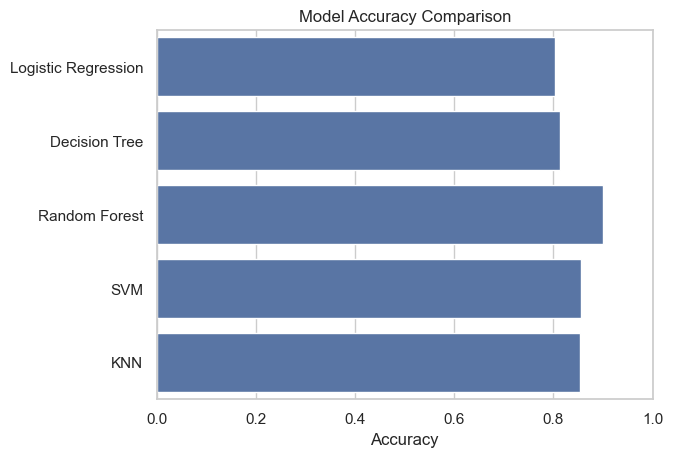

Plot saved to: ../plots/model_accuracy_comparison.png
Caption saved to: ../plots/model_accuracy_comparison.txt


In [37]:
model_names = list(evaluation_results.keys())
accuracies = [evaluation_results[name]["accuracy"] for name in model_names]

fig, ax = plt.subplots()
sns.barplot(x=accuracies, y=model_names, ax=ax)
ax.set_title("Model Accuracy Comparison")
ax.set_xlabel("Accuracy")
ax.set_xlim(0, 1)
plt.show()
save_plot(fig, "model_accuracy_comparison.png", "Accuracy comparison across all trained models.")


## Confusion Matrix of Best Model

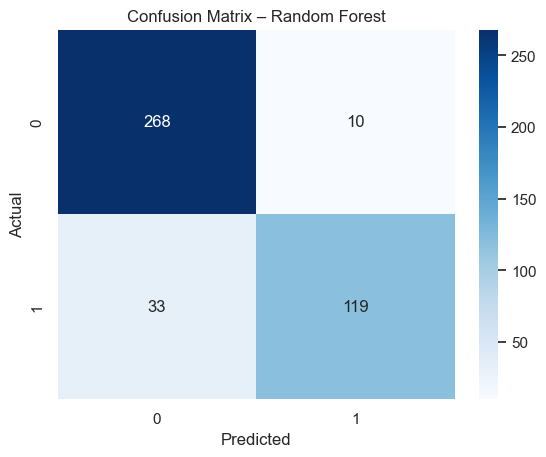

Plot saved to: ../plots/conf_matrix_Random_Forest.png
Caption saved to: ../plots/conf_matrix_Random_Forest.txt


In [40]:
best_model_name = max(evaluation_results, key=lambda name: evaluation_results[name]["accuracy"])
cm = evaluation_results[best_model_name]["confusion_matrix"]

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_title(f"Confusion Matrix – {best_model_name}")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.show()
save_plot(fig, f"conf_matrix_{best_model_name.replace(' ', '_')}.png", f"Confusion matrix for {best_model_name}")

###  Save Model Summary

In [43]:
from save_tools import save_notebook_and_summary
from datetime import datetime

summary = {
    "notebook": "04_Model_Training_and_Evaluation",
    "timestamp": datetime.now().isoformat(),
    "feature_set": features,
    "models_tested": list(evaluation_results.keys()),
    "best_model": best_model_name,
    "accuracies": {name: round(evaluation_results[name]["accuracy"], 4) for name in evaluation_results}
}

save_notebook_and_summary("04_Model_Training_and_Evaluation", summary)


Summary saved to: ../reports/04_Model_Training_and_Evaluation_summary_2025-06-08_23-52-22.json


## Model Selection and Purpose

To answer our research questions and test our hypotheses, we train and evaluate several supervised learning models.

### Why we are training multiple models:
We want to find the most effective algorithm for predicting Alzheimer's risk. Different models have different strengths:
- Some are interpretable and simple (Logistic Regression)
- Others handle non-linear patterns well (Random Forest)
- Some work better with smaller feature sets or scaled data (Support Vector Machine)

Training and comparing several models helps us:
- Answer **RQ1**: Can we predict Alzheimer's risk from patient data?
- Answer **RQ2**: Which features are most predictive?
- Support **H1**, **H2**, and **H3** with statistical evidence
- Select the best model for our **dashboard** (RQ3)

### Models Selected:
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Support Vector Classifier (SVC)
- k-Nearest Neighbors (KNN)

We will evaluate all models using:
- Accuracy
- Precision
- Recall
- F1-score
- Confusion matrix

This process supports our goal of using BI + AI to assist in early Alzheimer's detection.

## Data Preprocessing 

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Final feature selection based on EDA
features = [
    "Age",
    "MMSE",
    "FunctionalAssessment",
    "ADL",
    "Disorientation",
    "MemoryComplaints"
]

# Target variable
target = "Diagnosis"

# Extract feature matrix and target vector
X = df[features]
y = df[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Preprocessing complete.")
print(f"Features used: {features}")
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")


Preprocessing complete.
Features used: ['Age', 'MMSE', 'FunctionalAssessment', 'ADL', 'Disorientation', 'MemoryComplaints']
Training set shape: (1719, 6), Test set shape: (430, 6)



## Feature Distribution and Class Separation

Before training, we visualize how the selected features vary across the target classes.

- We use **histograms** and **box plots** for each feature, separated by the target variable (`Diagnosis`).
- This helps confirm that the features have discriminatory power and are well-scaled after preprocessing.

The goal is to validate that our selected features visually reflect meaningful patterns between diagnosed and non-diagnosed groups.


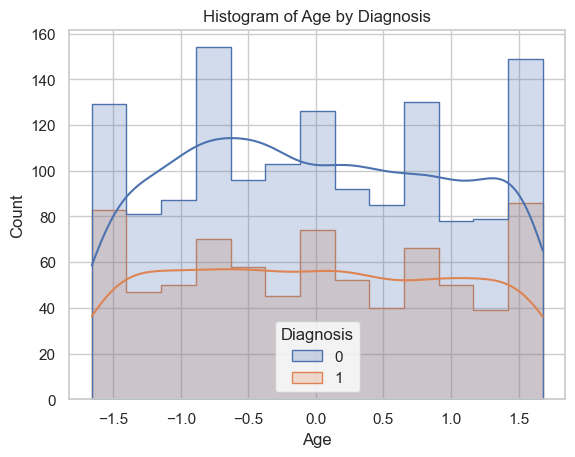

Plot saved to: ../plots/hist_Age.png
Caption saved to: ../plots/hist_Age.txt


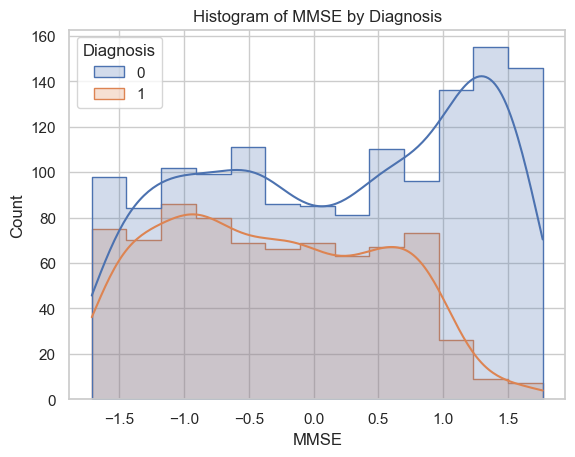

Plot saved to: ../plots/hist_MMSE.png
Caption saved to: ../plots/hist_MMSE.txt


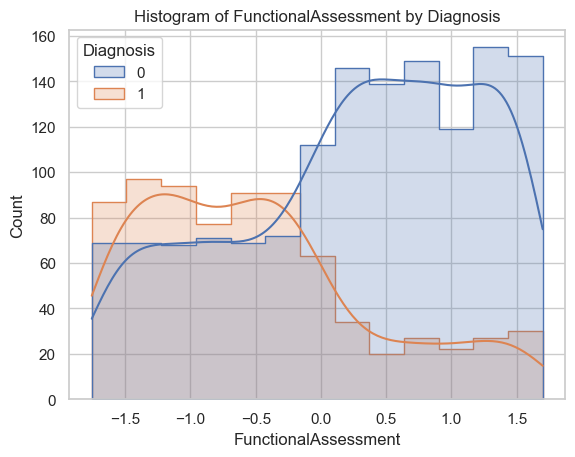

Plot saved to: ../plots/hist_FunctionalAssessment.png
Caption saved to: ../plots/hist_FunctionalAssessment.txt


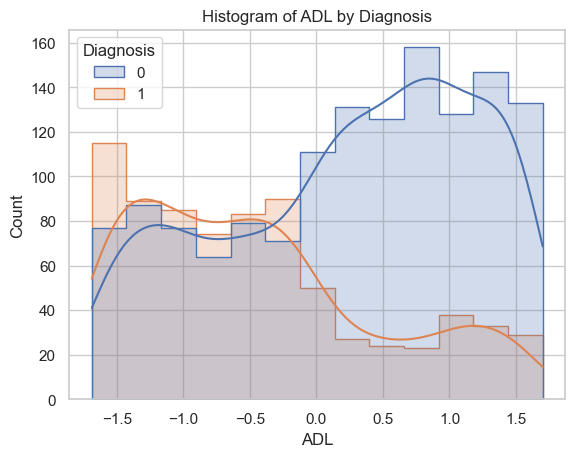

Plot saved to: ../plots/hist_ADL.png
Caption saved to: ../plots/hist_ADL.txt


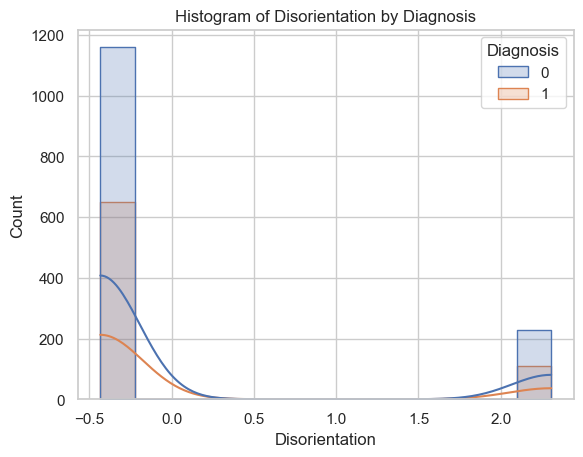

Plot saved to: ../plots/hist_Disorientation.png
Caption saved to: ../plots/hist_Disorientation.txt


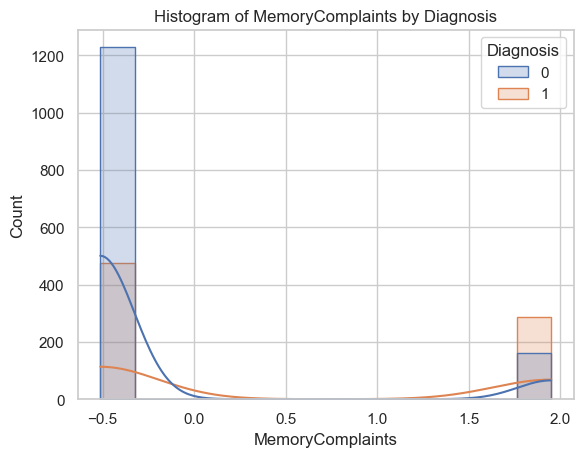

Plot saved to: ../plots/hist_MemoryComplaints.png
Caption saved to: ../plots/hist_MemoryComplaints.txt


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import pandas as pd

# Make sure path to utilities is correct
sys.path.append("../utils")
from save_tools import save_plot

# Combine scaled features and target into one DataFrame
X_vis = pd.DataFrame(X_scaled, columns=features)
X_vis["Diagnosis"] = y.values

# Plot and save histograms, while also displaying them
for feature in features:
    fig, ax = plt.subplots()
    sns.histplot(data=X_vis, x=feature, hue="Diagnosis", kde=True, ax=ax, element="step")
    ax.set_title(f"Histogram of {feature} by Diagnosis")
    plt.show() 
    
    # Save using custom utility
    save_plot(fig, f"hist_{feature}.png", f"Histogram showing distribution of {feature} by diagnosis class.")


## Model Training and Comparison

We now train and evaluate multiple supervised learning models to classify Alzheimer’s diagnosis.

### Models used:
- **Logistic Regression**: Interpretable baseline for binary classification.
- **Random Forest**: Ensemble model that captures nonlinear patterns and provides feature importance.
- **Support Vector Machine (SVM)**: Effective with scaled data, good for clear class margins.

Each model is trained on the training set and evaluated on the test set using accuracy and classification metrics. The results help identify the best-performing model for our Streamlit application.



In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}

# Store results
results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "accuracy": acc,
        "classification_report": report,
        "confusion_matrix": cm
    }

    # Print summary
    print(f"\n{name}")
    print(f"Accuracy: {acc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



Logistic Regression
Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       278
           1       0.75      0.66      0.70       152

    accuracy                           0.80       430
   macro avg       0.79      0.77      0.78       430
weighted avg       0.80      0.80      0.80       430


Random Forest
Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       278
           1       0.92      0.78      0.85       152

    accuracy                           0.90       430
   macro avg       0.91      0.87      0.89       430
weighted avg       0.90      0.90      0.90       430


SVM
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.89       278
           1       0.86      0.71      0.78       152

    accuracy               

## Model Evaluation and Visualization

We now select the best-performing model based on accuracy and visualize its results:

- **Confusion Matrix**: Shows the number of true vs. predicted classes, helping assess false positives and negatives.
- **Accuracy Comparison**: A bar chart of each model’s accuracy for easy performance comparison.

These visuals support selecting a model for deployment and understanding trade-offs in classification performance.

### Identify Best Model & Plot Confusion Matrix

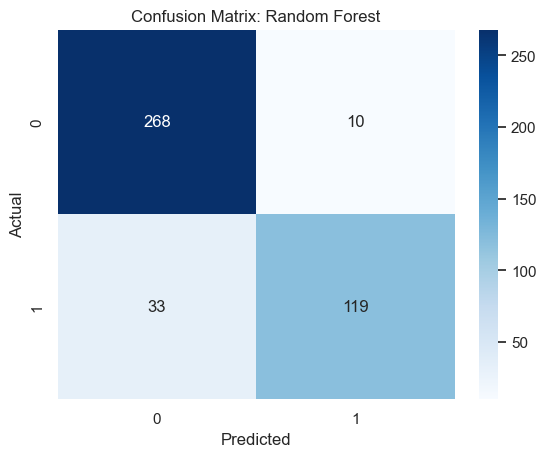

Plot saved to: ../plots/conf_matrix_Random_Forest.png
Caption saved to: ../plots/conf_matrix_Random_Forest.txt


In [63]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from save_tools import save_plot

# Find best model by accuracy
best_model_name = max(results, key=lambda x: results[x]["accuracy"])
best_cm = results[best_model_name]["confusion_matrix"]

# Plot confusion matrix
fig, ax = plt.subplots()
sns.heatmap(best_cm, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_title(f"Confusion Matrix: {best_model_name}")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.show()

# Save confusion matrix plot
save_plot(fig, f"conf_matrix_{best_model_name.replace(' ', '_')}.png", f"Confusion matrix for {best_model_name}.")


### Accuracy Comparison Bar Chart

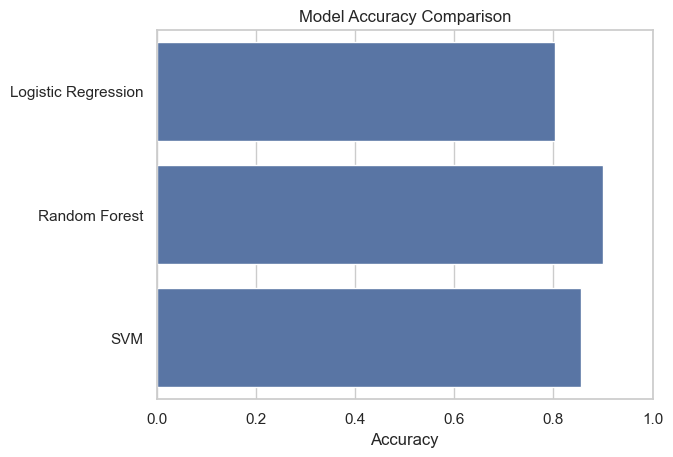

Plot saved to: ../plots/model_accuracy_comparison.png
Caption saved to: ../plots/model_accuracy_comparison.txt


In [70]:
# Prepare accuracy data
model_names = list(results.keys())
accuracies = [results[name]["accuracy"] for name in model_names]

# Plot bar chart
fig, ax = plt.subplots()
sns.barplot(x=accuracies, y=model_names, ax=ax)
ax.set_title("Model Accuracy Comparison")
ax.set_xlabel("Accuracy")
ax.set_xlim(0, 1)
plt.show()

# Save accuracy chart
save_plot(fig, "model_accuracy_comparison.png", "Accuracy comparison across all trained models.")


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Store results
evaluation_results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    evaluation_results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "confusion_matrix": confusion_matrix(y_test, y_pred),
        "report": classification_report(y_test, y_pred, output_dict=True)
    }

    print(f"\n{name}")
    print(classification_report(y_test, y_pred))



Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       278
           1       0.75      0.66      0.70       152

    accuracy                           0.80       430
   macro avg       0.79      0.77      0.78       430
weighted avg       0.80      0.80      0.80       430


Decision Tree
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       278
           1       0.72      0.76      0.74       152

    accuracy                           0.81       430
   macro avg       0.80      0.80      0.80       430
weighted avg       0.82      0.81      0.81       430


Random Forest
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       278
           1       0.92      0.78      0.85       152

    accuracy                           0.90       430
   macro avg       0.91      0.87      0.89       430
weighted avg       0.90

In [ ]:
# Boxplots
for feature in features:
    fig, ax = plt.subplots()
    sns.boxplot(data=X_vis, x="Diagnosis", y=feature, ax=ax)
    ax.set_title(f"Boxplot of {feature} by Diagnosis")
    save_plot(fig, f"box_{feature}.png", f"Boxplot comparing {feature} values for each diagnosis class.")


-------------------